# Titanic Survival Prediction data science project

This file is meant to explain the different steps of this project.

In [1]:
# Import librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


### Loading the data
Here the data (that comes from Kaggle) is already split into two datasets:
- **train** is meant for training
- **test** is meant for testing

In [2]:
# Importing the dataset
data = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

## **Exploratory Data Analysis (EDA)**

The EDA is usefull to get an overview of the data provided: get a look at the first few rows, the different types, missing values...
It is also useful to create visualisations, to analyse the correlation between the different columns. In this case, how age, gender, passenger class, etc. affects the survival rates.
Useful to have an idea of the ranges of the variables to identify outliers.

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Notice training and test are built the same way. That was expected. The following data analysis will therefore be done on the training dataset only. We should be able to expect the same range of results in the testing dataset. 

If the model predictions are very efficient on the training dataset but only little on the testing dataset, we might have to go back to data analysis on the testing dataset (of course there can be other reasons explaining such results: overfitting...).

In [5]:
print("Summary of the columns, emptiness and types")
data.info()
print()
print("-------")
print()
print("Summary statistics for numerical columns ")
data.describe()

Summary of the columns, emptiness and types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

-------

Summary statistics for numerical columns 


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **Data Cleaning and Preprocessing**

#### Dealing with missing values

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin and Embarked columns have missing values. There are different ways to tackle the issue.
- The first one is to drop the rows with missing values. This leads to loss of data, but in a large dataset, dropping a few rows isn't as consequent as it is for a small dataset.
- The second one is to inpute the missing data. Either with the mean of the corresponding value, or with a constant value.
- The third one is to use classification or regression models to fill in the missing data.

To have more insights on the correlation of survival rates and other data, we'll do some data visualisation.

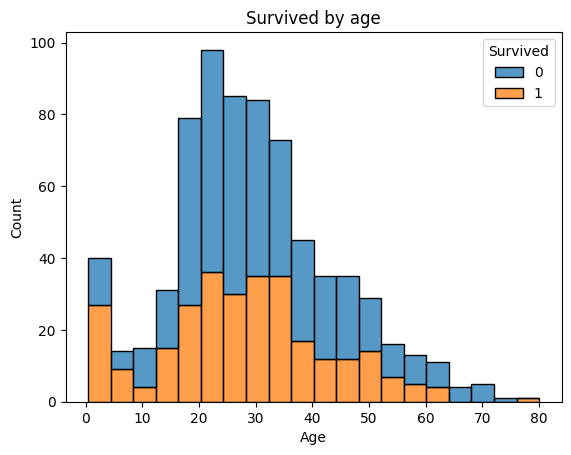

In [7]:
sns.histplot(data=data, x='Age', hue='Survived', multiple='stack')
plt.title('Survived by age')

plt.savefig("./data_analysis_plots/survived_by_age")

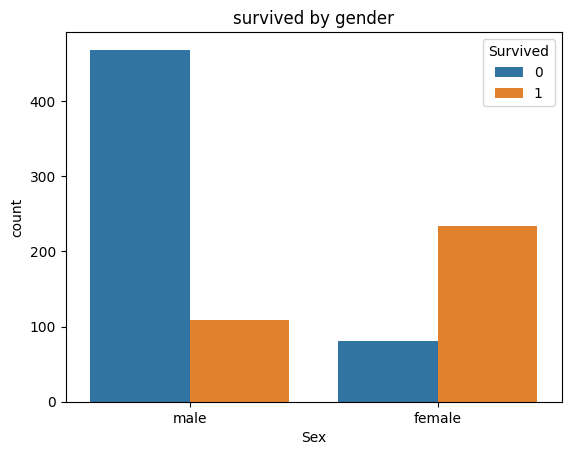

In [8]:
sns.countplot(data=data, x='Sex', hue='Survived')
plt.title('survived by gender')
plt.savefig("./data_analysis_plots/survived_by_sex")

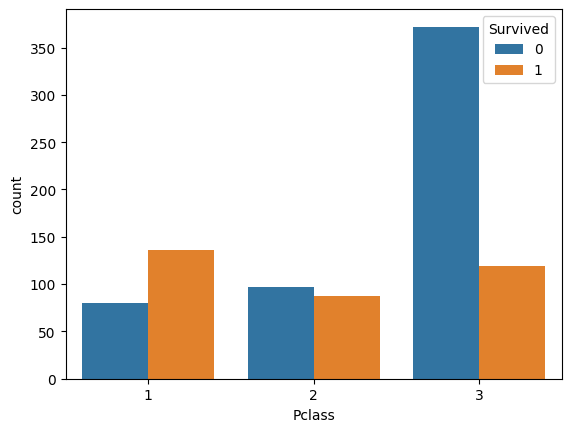

In [9]:
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.savefig("./data_analysis_plots/survived_by_passenger_class")

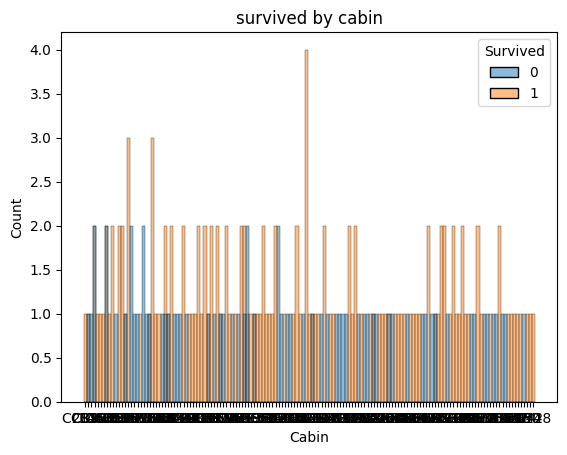

In [10]:
sns.histplot(data=data, x='Cabin', hue='Survived')
plt.title('survived by cabin')
plt.savefig("./data_analysis_plots/survived_by_cabin")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

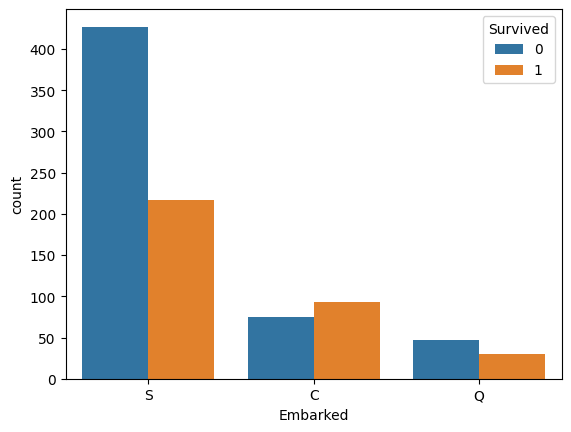

In [11]:
sns.countplot(data=data, x='Embarked', hue='Survived')

The plots show the age, gender and passenger class are important for the survived outcome, meanwhile the cabin data isn't complete enough to draw conclusions. It might eventually result in granularity loss of the predictive model, but we'll chose to discard this column. 

To confirm this data cleaning, we proceed by doing a correlation heatmap. This will allow us to have an overview on which data has the most impact on survival rates. 
To do this, we must convert categorical data: this means converting columns like sex and embark to numerical values.
What we will do is this:

**Sex**
- Female -> 1
- Male -> 0

**Embarked**
- S -> 0
- C -> 1
- Q -> 2

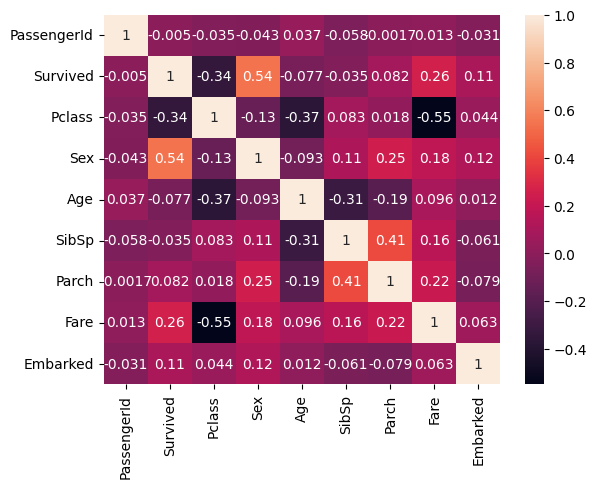

In [12]:
wdata = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
wdata['Sex'] = wdata['Sex'].map({'male':0, 'female':1})
wdata['Embarked'] = wdata['Embarked'].map({'S':0, 'C':1, 'Q':2})


sns.heatmap(wdata.corr(), annot=True)
plt.savefig('./data_analysis_plots/correlation_matrix.png')

In [13]:
wdata.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0


In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Heatmap -variable correlation- analysis

#### Theoretical explanations
First of all, correlation ranges from -1 to 1.
Then, the closer the value is from -1 or 1, the higher the correlation is, between the variables.
For positive numbers, if one increase, the other does too.
For negative numbers, if one decreases, the other increases.

#### Analysis of the heatmap results
The following variables are ordered by descending order of correlation, for both positive and negative values.

**Positive Values**:
- Sex
- Fare
- Embarked
- Parch - _Negligible (at first at least)_

**Negative Values**:
- Passenger class
- Age - _Negligible (at first at least)_
- Sibsp - _Negligible (at first at least)_

#### Feature engineering

We could also be tempted to join Sibsp and Parch to create a family to gain in granularity.
We will keep that idea aside for now, but may get back to it.


Here, we will:
- drop the missing embarked rows (2 rows, negligible loss of data).
- fill in empty age fields with the mean age of passengers

In [15]:
# Drop rows with missing Embarked values
wdata = wdata.dropna(subset=['Embarked'])

# Fill missing age values with the mean
wdata['Age'] = wdata['Age'].fillna(wdata['Age'].mean())

wdata.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [16]:
print(len(wdata))

889


In [17]:
y = wdata['Survived']
X = wdata.drop('Survived', axis=1)

In [18]:
# Now we scale the values

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(wdata)

print(X)

     PassengerId  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0              1       3    0  22.000000      1      0   7.2500       0.0
1              2       1    1  38.000000      1      0  71.2833       1.0
2              3       3    1  26.000000      0      0   7.9250       0.0
3              4       1    1  35.000000      1      0  53.1000       0.0
4              5       3    0  35.000000      0      0   8.0500       0.0
..           ...     ...  ...        ...    ...    ...      ...       ...
886          887       2    0  27.000000      0      0  13.0000       0.0
887          888       1    1  19.000000      0      0  30.0000       0.0
888          889       3    1  29.642093      1      2  23.4500       0.0
889          890       1    0  26.000000      0      0  30.0000       1.0
890          891       3    0  32.000000      0      0   7.7500       2.0

[889 rows x 8 columns]


The data should now be clean, and ready to be processed by the model. The last step before selecting the model is to divide the train dataset into two seperate datasets. One to train the model, the other one to test it.

Usually, a dataset is seperated into 70 to 80% training and 20 to 30% testing. We'll abide by these proportions.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train)

     PassengerId  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
351          352       1    0  29.642093      0      0  35.0000       0.0
125          126       3    0  12.000000      1      0  11.2417       1.0
578          579       3    1  29.642093      1      0  14.4583       1.0
423          424       3    1  28.000000      1      1  14.4000       0.0
119          120       3    1   2.000000      4      2  31.2750       0.0
..           ...     ...  ...        ...    ...    ...      ...       ...
837          838       3    0  29.642093      0      0   8.0500       0.0
193          194       2    0   3.000000      1      1  26.0000       0.0
630          631       1    0  80.000000      0      0  30.0000       0.0
560          561       3    0  29.642093      0      0   7.7500       2.0
685          686       2    0  25.000000      1      2  41.5792       1.0

[622 rows x 8 columns]


It is now time to choose the adapted predictive model.

Since the purpose of this project is to gain skills in model building and tuning, we will build several of them.
Then, we will make an analysis of the results, and cross validate the results. We should then be able to determine which model suits the best (Reminder: Linear Regression and other similar models aren't adapted here. The ouput is expected to be binary and not continuous.)

For now, let's start with Logistic Regression.

## **Logistic Regression**

### Logistic Regression Characteristics

- **Output Type**: Predicts probabilities between 0 and 1.
- **Use Case**: Used for classification problems. Ideal for binary problems.
- **Equation Form**: 
  `p = 1 / (1 + exp(-(β0 + β1*x1 + ... + βn*xn)))`
- **Model Output**: Outputs a probability, then converts it to a class (0 or 1).
- **Range of Predictions**: Outputs values between 0 and 1 (probabilities).


#### **Applying the theorie to our project**

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
SLR = LogisticRegression()
SLR.fit(X_train, y_train)

print("Accuracy on the training dataset: " + str(SLR.score(X_train, y_train)))  # Accuracy

Accuracy on the training dataset: 0.8118971061093248


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


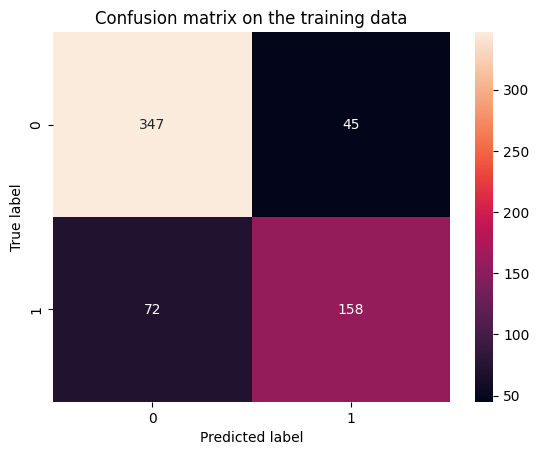

In [23]:
# Let's now display the confusion matrix to see how well the model performed on the training data

y_train_prediction = SLR.predict(X_train)

sns.heatmap(sk.metrics.confusion_matrix(y_train, y_train_prediction), annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on the training data')
plt.savefig("./data_analysis_plots/confusion_matrix_training_data.png")
plt.show()


We have checked, the accuracy shown by the confusion matrix is the same as the model, as expected.

Here, we can see several things:
- 349 passengers were correctly classified as not survived. These represent the True Negatives.
- 159 passengers were correctly classified as survived. These represent the True Positives.
- 71 passengers were wrongly classified as not survived. These represent the False Negatives.
- 43 passengers were wrongly classified as survived. These represent the False Positives.

The accuracy is 0.82, which is quite good. Could do better though.

Let's have a look at other performance metrics. We'll start with the precision, recall and F1 score.

- **Precision**: The number of True Positives divided by the number of True Positives and False Positives. It is the ability of the classifier not to label as positive a sample that is negative.


In [24]:
precision = sk.metrics.precision_score(y_train, y_train_prediction)
print("Precision on the training data: " + str(precision))

Precision on the training data: 0.7783251231527094


In our case, the precision isn't the most important metric.
With the given context, it is more important to find the False Negatives and True Positives. 
Of course, from a budget point of vue, it was better at the time to focus on the False negatives and so lower the false positives rate.

This is where the recall comes in.

- **Recall** (Sensitivity): The number of True Positives divided by the number of True Positives and the number of False Negatives. It is the ability of the classifier to find all the positive samples.

In [25]:
recall = sk.metrics.recall_score(y_train, y_train_prediction)
print("Recall: " + str(recall))

Recall: 0.6869565217391305


The recall value is of 0.69. It means the model is able to find 69% of the positive values.
The recall isn't very good. It means the model is not able to find 31% of the positive values.
In other words, the model is not able to find 31% of the passengers that survived.

- **F1 Score**: The weighted average of Precision and Recall. It takes both false positives and false negatives into account. It is the harmonic mean of the precision and recall.

In [26]:
f1 = sk.metrics.f1_score(y_train, y_train_prediction)
print("F1 score: " + str(f1))

F1 score: 0.7297921478060047


The F1 score is of 0.74. A high (close to 1) F1 score means that the dataset is balanced between recall and precision. The amount of False Negatives is yet a little higher than the amount of False Negatives, explaining the F1 score.

Let's try predicting some values from the test dataset and display them, to check whether or not the model is efficient on another dataset. Bear in mind that it may not be, as it could be overfitting or underfitting.

In [27]:
y_test_prediction = SLR.predict(X_test)

print("Accuracy on test dataset: " + str(SLR.score(X_test, y_test)))  # Accuracy

Accuracy on test dataset: 0.7790262172284644


The accuracy is 0.78, which is pretty close to the training accuracy. This means the model is not overfitting. 

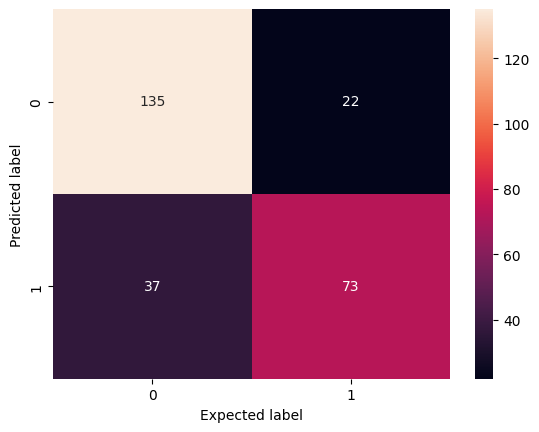

In [28]:
# Let's now display the confusion matrix to see how well the model performed on the test data, in the case of the simple model with only sex as a feature

sns.heatmap(sk.metrics.confusion_matrix(y_test, y_test_prediction), annot=True, fmt='d')
plt.ylabel('Predicted label')
plt.xlabel('Expected label')

plt.savefig("./data_analysis_plots/confusion_matrix_testing_data_SLR.png")

Here, we can see several things:
- 135 passengers were correctly classified as not survived. These represent the True Negatives.
- 73 passengers were correctly classified as survived. These represent the True Positives.
- 22 passengers were wrongly classified as not survived. These represent the False Negatives.
- 37 passengers were wrongly classified as survived. These represent the False Positives.


Let's calculate the different metrics used previously.

In [29]:
precision = sk.metrics.precision_score(y_test, y_test_prediction)
recall = sk.metrics.recall_score(y_test, y_test_prediction)
f1 = sk.metrics.f1_score(y_test, y_test_prediction)

print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))

Precision: 0.7684210526315789
Recall: 0.6636363636363637
F1 Score: 0.7121951219512195


Let's plot the ROC curve

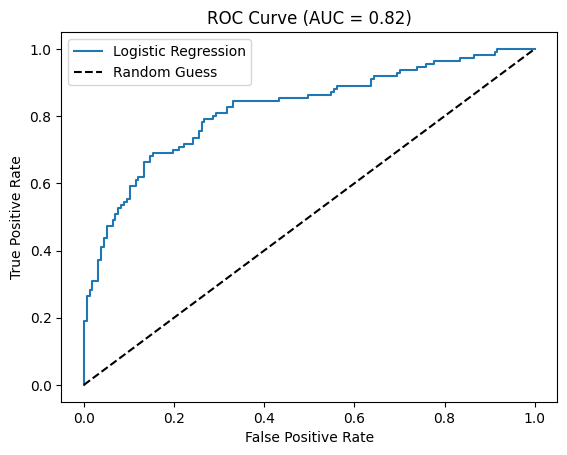

In [30]:
# ROC Curve plot
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, SLR.predict_proba(X_test)[:,1]) # false positive rate, true positive rate, thresholds

# Calculate the AUC score
auc_score = roc_auc_score(y_test, SLR.predict_proba(X_test)[:,1])

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
plt.legend(['Logistic Regression', 'Random Guess'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.savefig("./data_analysis_plots/LR_ROC_curve.png")
plt.show()

As expected the ROC curve is quite good. The AUC is of 0.82 (supposed to be between 0.5 and 1), which is a good score. The model is able to predict the survival rates well.

The results on both the training and testing datasets perhaps aren't good enough, meaning that the model is probably too simple to understand the underlying patterns in the dataset.
We could be tempted to optimize the model, by tuning the hyperparameters.
We won't do it here, since it may not be the best model for this dataset. We will try other models first.


## **K-Nearest Neighbors (KNN)**

### K-Nearest Neighbors Characteristics
- **Output Type**: Class label.
- **Use Case**: Used for classification problems.

#### **Applying the theorie to our project**

We will start by using the KNN model with the default parameters.


In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
print("Accuracy on the training dataset: " + str(knn.score(X_train, y_train)))

Accuracy on the training dataset: 0.8118971061093248


The accuracy on the training subset is of 0.81 which is quite good once again
Let's try the model on the testing dataset.

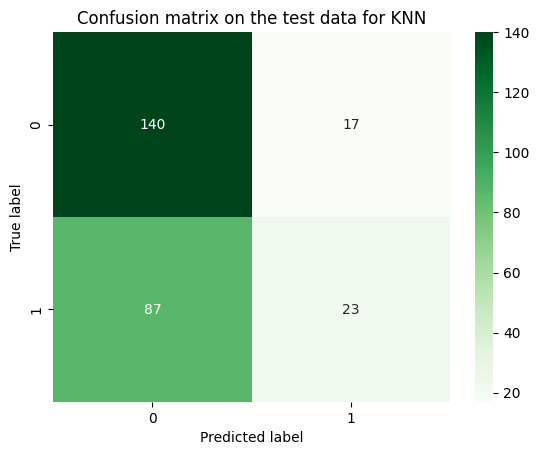

Accuracy on the test dataset: 0.6104868913857678


In [32]:
# Test the model on the test data
y_test_knn_prediction = knn.predict(X_test)
accuracy_knn_test = sk.metrics.accuracy_score(y_test, y_test_knn_prediction)

sns.heatmap(sk.metrics.confusion_matrix(y_test, y_test_knn_prediction), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on the test data for KNN')
plt.savefig("./data_analysis_plots/confusion_matrix_test_KNN.png")
plt.show()

print("Accuracy on the test dataset: " + str(accuracy_knn_test))

The model is clearly overfitting. We will try to tune the hyperparameters to see if we can get better results.
We will use the elbow method to do so - this method should help us choose a better number for K

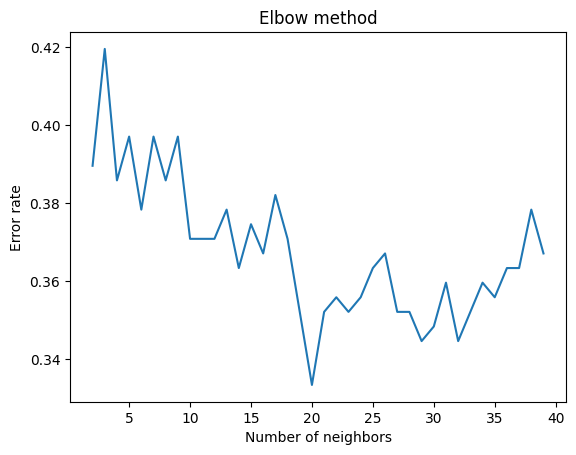

In [33]:
# Elbow method to find the best number of neighbors

error_rate = []
# Will take some time
for i in range(2,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.plot(range(2, 40), error_rate)
plt.xlabel('Number of neighbors')
plt.ylabel('Error rate')
plt.title('Elbow method')
plt.savefig("./data_analysis_plots/knn_elbow_method")
plt.show()


In [34]:
print(error_rate)
print("The best number of neighbors is: " + str(error_rate.index(min(error_rate)) + 1))

[0.3895131086142322, 0.41947565543071164, 0.3857677902621723, 0.3970037453183521, 0.3782771535580524, 0.3970037453183521, 0.3857677902621723, 0.3970037453183521, 0.3707865168539326, 0.3707865168539326, 0.3707865168539326, 0.3782771535580524, 0.36329588014981273, 0.37453183520599254, 0.36704119850187267, 0.38202247191011235, 0.3707865168539326, 0.352059925093633, 0.3333333333333333, 0.352059925093633, 0.35580524344569286, 0.352059925093633, 0.35580524344569286, 0.36329588014981273, 0.36704119850187267, 0.352059925093633, 0.352059925093633, 0.3445692883895131, 0.34831460674157305, 0.3595505617977528, 0.3445692883895131, 0.352059925093633, 0.3595505617977528, 0.35580524344569286, 0.36329588014981273, 0.36329588014981273, 0.3782771535580524, 0.36704119850187267]
The best number of neighbors is: 19


Though the curve does not seem to match the shape of an elbow, it seems like K = 19 minimises the error_rate. Let's try with K = 19 to see if our results improve.

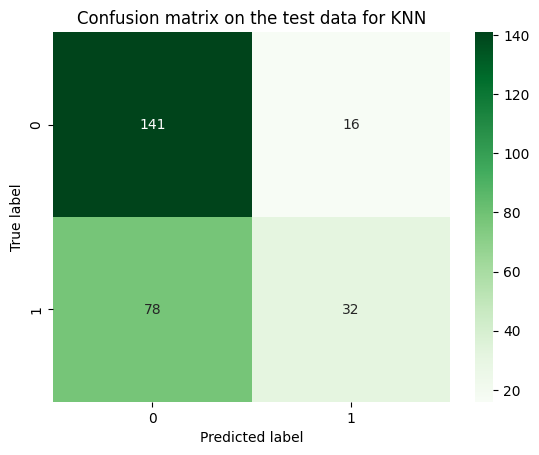

Accuracy on the training dataset: 0.6929260450160771
Accuracy on the test dataset: 0.6479400749063671


In [35]:
KNN = KNeighborsClassifier(n_neighbors=19)
KNN.fit(X_train, y_train)

# Test the model on the test data
y_test_prediction = KNN.predict(X_test)
accuracy_knn_test = sk.metrics.accuracy_score(y_test, y_test_prediction)

sns.heatmap(sk.metrics.confusion_matrix(y_test, y_test_prediction), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on the test data for KNN')
plt.savefig("./data_analysis_plots/confusion_matrix_test_optK_KNN")
plt.show()

print("Accuracy on the training dataset: " + str(KNN.score(X_train, y_train)))
print("Accuracy on the test dataset: " + str(accuracy_knn_test))


In [36]:
precision = sk.metrics.precision_score(y_test, y_test_prediction)
recall = sk.metrics.recall_score(y_test, y_test_prediction)
f1 = sk.metrics.f1_score(y_test, y_test_prediction)

print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))

Precision: 0.6666666666666666
Recall: 0.2909090909090909
F1 Score: 0.4050632911392405


There is much less overfitting with K = 19. But the accuracy on both datasets is terrible.
And the rate (recall score) of False Negatives is very bad, which in our case is problematic.
Perhaps we can try to evaluate which distance would be best in our model.

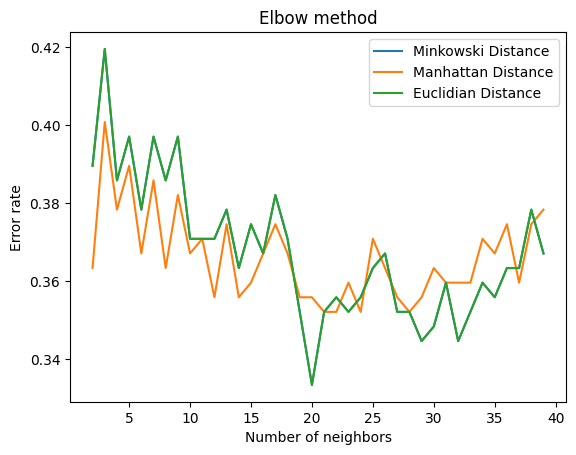

In [37]:
error_rate_minkowski = []
error_rate_manhattan = []
error_rate_euclidian = []

for i in range(2,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate_minkowski.append(np.mean(pred_i != y_test))

for i in range(2,40):
    knn = KNeighborsClassifier(n_neighbors=i, p=1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate_manhattan.append(np.mean(pred_i != y_test))

for i in range(2,40):
    knn = KNeighborsClassifier(n_neighbors=i, p=2)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate_euclidian.append(np.mean(pred_i != y_test))


plt.plot(range(2, 40), error_rate_minkowski, label='Minkowski Distance')
plt.plot(range(2, 40), error_rate_manhattan, label='Manhattan Distance')
plt.plot(range(2, 40), error_rate_euclidian, label='Euclidian Distance')
plt.xlabel('Number of neighbors')
plt.ylabel('Error rate')
plt.title('Elbow method')
plt.legend()
plt.savefig("./data_analysis_plots/knn_elbow_method_distances.png")
plt.show()

In [38]:
assert error_rate_minkowski == error_rate_euclidian # Same values

In [39]:
print(f"The best number of neighbors is:  {str(error_rate.index(min(error_rate_minkowski)) + 1)} for the Minkowski/Euclidian distance")
print(f"The best number of neighbors is:  {str(error_rate.index(min(error_rate_manhattan)) + 1)} for the Manhattan distance")

The best number of neighbors is:  19 for the Minkowski/Euclidian distance
The best number of neighbors is:  18 for the Manhattan distance


We can try with the Manhattan distance :

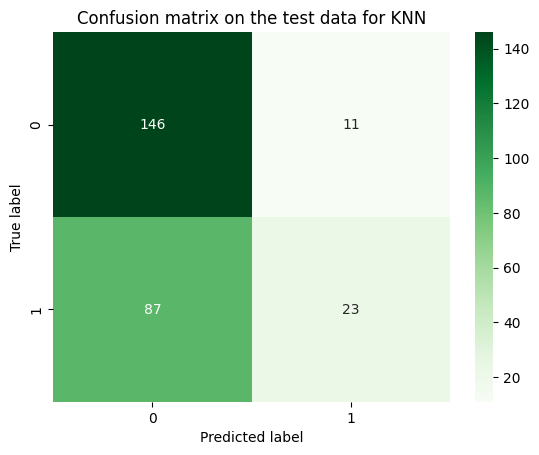

Accuracy on the training dataset: 0.7009646302250804
Accuracy on the test dataset: 0.6329588014981273


In [40]:
KNN = KNeighborsClassifier(n_neighbors=18, p=1)
KNN.fit(X_train, y_train)

# Test the model on the test data
y_test_KNN_prediction = KNN.predict(X_test)
accuracy_knn_test = sk.metrics.accuracy_score(y_test, y_test_KNN_prediction)

sns.heatmap(sk.metrics.confusion_matrix(y_test, y_test_KNN_prediction), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on the test data for KNN')
plt.savefig("./data_analysis_plots/confusion_matrix_test_optK_manhattan_KNN")
plt.show()

print("Accuracy on the training dataset: " + str(KNN.score(X_train, y_train)))
print("Accuracy on the test dataset: " + str(accuracy_knn_test))

In [41]:
precision = sk.metrics.precision_score(y_test, y_test_prediction)
recall = sk.metrics.recall_score(y_test, y_test_prediction)
f1 = sk.metrics.f1_score(y_test, y_test_prediction)

print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))

Precision: 0.6666666666666666
Recall: 0.2909090909090909
F1 Score: 0.4050632911392405


There's a little more overfitting (slightly). Yet, the accuracy is still poor - worse than logistic regression model. The recall score and other metrics also show poor results. We can try with other classification models.

## **Decision Trees**

We will now apply the Decision Tree model for our classification purposes.

In [42]:
from sklearn.tree import DecisionTreeClassifier

Let's implement a decision tree with "random" parameters (ex: Max Depth = 10).
We will use the Gini index to effectively partition the data into subsets - and from there classify the data in either class 0 or 1.
Knowing that the depth of a decision tree is tightly related to overfitting, we may have some overfitting with a depth of 10.

In [43]:
Gini_DT = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=10)

Gini_DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [44]:
print("Accuracy on the training dataset: " + str(Gini_DT.score(X_train, y_train)))

Accuracy on the training dataset: 0.9517684887459807


The accuracy on the training dataset is of 0.95, which is very high relatively to the range of results we obtained earlier. To that extent, we expect to have some overfitting. Let's test the model on the testing dataset.

In [45]:
# Test the model on the test data
y_test_DT_prediction = Gini_DT.predict(X_test)
accuracy_dt_test = sk.metrics.accuracy_score(y_test, y_test_DT_prediction)
print("Accuracy on the test dataset: " + str(accuracy_dt_test))

Accuracy on the test dataset: 0.7640449438202247


As expected, the results show a lot of overfitting (a difference of 0.19 between the accuracies on the training and testing datasets). We need to evaluate the optimal number for max_depth.
Therefore, we can conclude that the max_depth < 10 for our hyperparameter tuning.

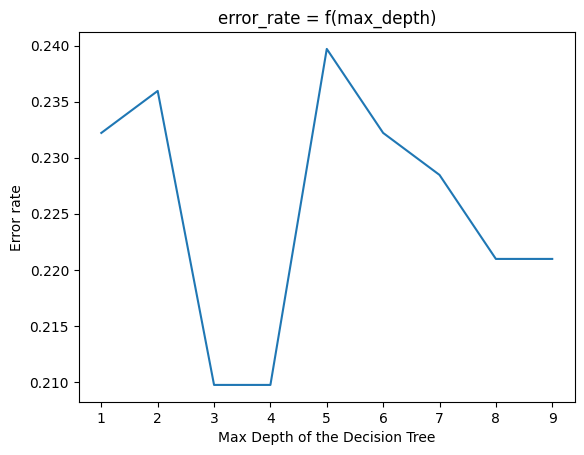

The best number of neighbors is: 3


In [46]:
DT_error_rate = []

for i in range(1,10):
    gini_dt = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=i)
    gini_dt.fit(X_train,y_train)
    pred_i = gini_dt.predict(X_test)
    DT_error_rate.append(np.mean(pred_i != y_test))

plt.plot(range(1, 10), DT_error_rate)
plt.xlabel('Max Depth of the Decision Tree')
plt.ylabel('Error rate')
plt.title('error_rate = f(max_depth)')
plt.savefig("./data_analysis_plots/DT_max_depth_evaluation.png")
plt.show()

print("The best number of neighbors is: " + str(DT_error_rate.index(min(DT_error_rate)) + 1))

We will now train the evaluate the model with max_depth = 3 - according to the results obtained above.

In [47]:
Gini_DT = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=3)
Gini_DT.fit(X_train, y_train)

y_test_DT_prediction = Gini_DT.predict(X_test)
accuracy_dt_test = sk.metrics.accuracy_score(y_test, y_test_DT_prediction)

print("Accuracy on the training dataset: " + str(Gini_DT.score(X_train, y_train)))
print("Accuracy on the testing dataset: " + str(accuracy_dt_test))

Accuracy on the training dataset: 0.8472668810289389
Accuracy on the testing dataset: 0.7902621722846442


There is almost no overfitting left (delta accuracy of 0.6) in the model.
Let's display the confusion matrix.

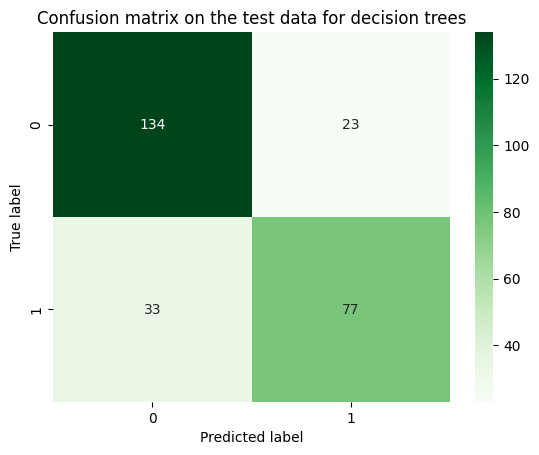

Precision: 0.77
Recall: 0.7
F1 Score: 0.7333333333333333


In [48]:
sns.heatmap(sk.metrics.confusion_matrix(y_test, y_test_DT_prediction), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on the test data for decision trees')
plt.savefig("./data_analysis_plots/confusion_matrix_test_DT")
plt.show()

precision = sk.metrics.precision_score(y_test, y_test_DT_prediction)
recall = sk.metrics.recall_score(y_test, y_test_DT_prediction)
f1 = sk.metrics.f1_score(y_test, y_test_DT_prediction)

print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))



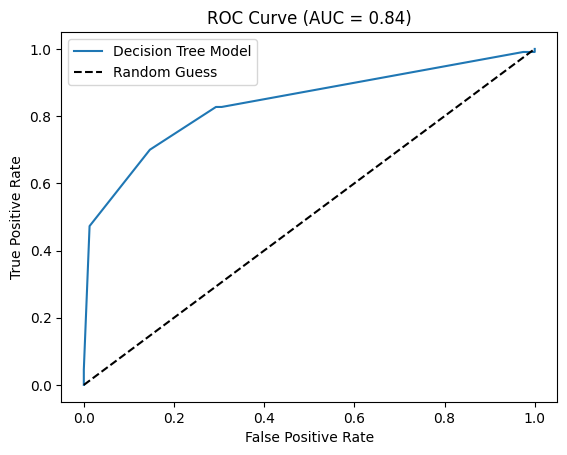

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, Gini_DT.predict_proba(X_test)[:,1]) # false positive rate, true positive rate, thresholds

# Calculate the AUC score
auc_score = roc_auc_score(y_test, Gini_DT.predict_proba(X_test)[:,1])

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
plt.legend(['Decision Tree Model', 'Random Guess'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.savefig("./data_analysis_plots/DT_ROC_curve.png")
plt.show()

Though the accuracy is not too bad with this model, the other metrics show acceptable results, including the recall score. We still need better performance and so we need to either fine-tune other hyperparameters, or change model.
We can implement random forest. Since it is an aggregation of several trees, it should make the model more robust, and therefore perform better.

## **Random Forest**

In this section, we will implement the Random Forest model.

In [50]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(criterion='gini', n_estimators=100, bootstrap=False, max_depth=10)
RF.fit(X_train, y_train)

y_test_RF_prediction = RF.predict(X_test)
accuracy_rf_test = sk.metrics.accuracy_score(y_test, y_test_RF_prediction)

print("Accuracy on the training dataset: " + str(RF.score(X_train, y_train)))
print("Accuracy on the testing dataset: " + str(accuracy_rf_test))

Accuracy on the training dataset: 0.9758842443729904
Accuracy on the testing dataset: 0.7827715355805244


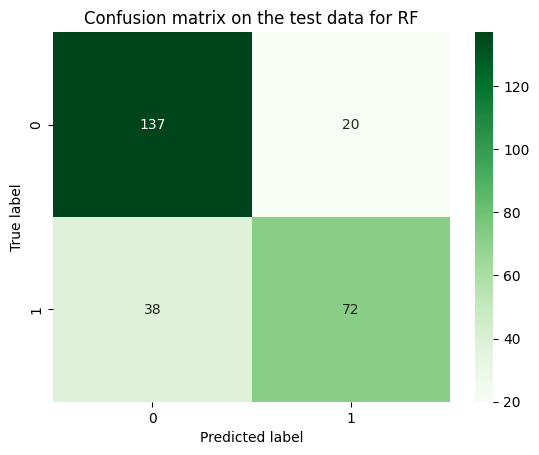

Precision: 0.782608695652174
Recall: 0.6545454545454545
F1 Score: 0.7128712871287128


In [51]:
sns.heatmap(sk.metrics.confusion_matrix(y_test, y_test_RF_prediction), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on the test data for RF')
plt.savefig("./data_analysis_plots/confusion_matrix_test_RF.png")
plt.show()

precision = sk.metrics.precision_score(y_test, y_test_RF_prediction)
recall = sk.metrics.recall_score(y_test, y_test_RF_prediction)
f1 = sk.metrics.f1_score(y_test, y_test_RF_prediction)

print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))

The model is quite overfitting. Maybe we can improve the performance of the model by tuning the hyperparameters.
We can work on the following hyperparameters : 
- Bootstrap
- Random State
- Number of Trees
- Max Depth

In [53]:
import numpy as np

In [54]:
bootstrap = [False, True]
random_state = [i for i in range(0, 200, 20)]
number_of_trees = [i for i in [32, 64, 128]]
max_depth = [i for i in range(1, 8)]

In [55]:
rf_error_rate = []

for i in bootstrap:
    for j in number_of_trees:
        for k in max_depth:
            for n in random_state:
                rf = RandomForestClassifier(criterion='gini', n_estimators=j, bootstrap=i, max_depth=k, random_state=n)
                rf.fit(X_train, y_train)
                pred_i = rf.predict(X_test)
                rf_error_rate.append([i, j, k, n, np.mean(pred_i != y_test)])



In [56]:
RandomForestdf = pd.DataFrame(rf_error_rate, columns=['Bootstrap', 'Number of Trees', 'Max Depth', 'Random State', 'Error Rate'])
RandomForestdf.head()

,Bootstrap,Number of Trees,Max Depth,Random State,Error Rate
0,False,32,1,0,0.235955
1,False,32,1,20,0.232210
2,False,32,1,40,0.310861
3,False,32,1,60,0.318352
4,False,32,1,80,0.393258


In [57]:
RandomForestdf['Bootstrap'] = RandomForestdf['Bootstrap'].map({'False':0, 'True':1})

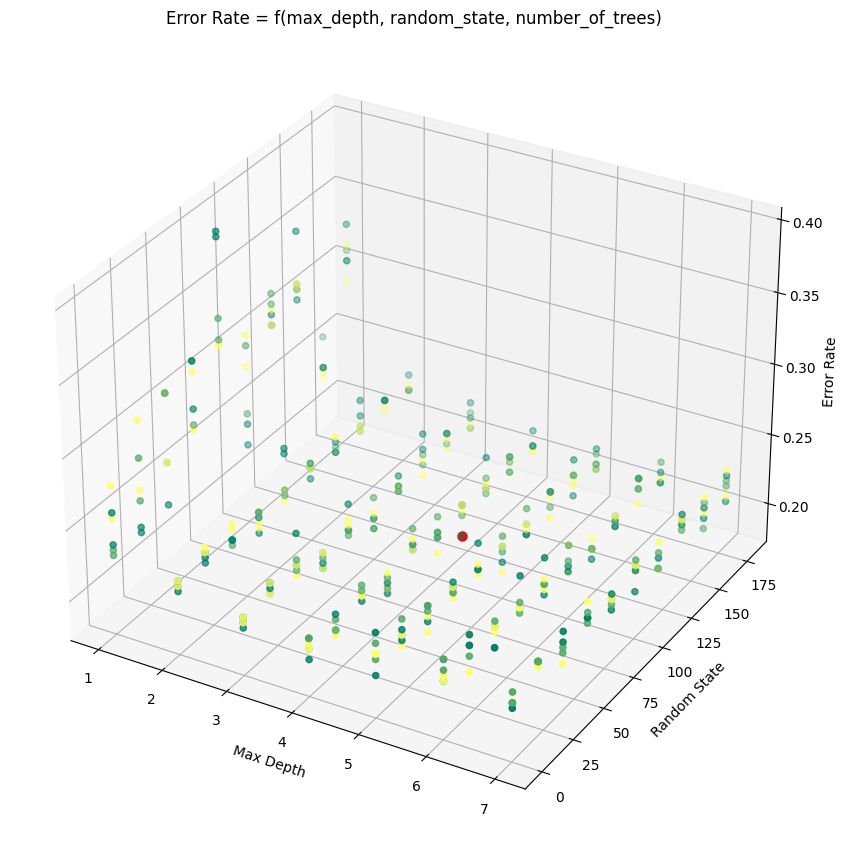

In [58]:
from mpl_toolkits.mplot3d import Axes3D
     
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = RandomForestdf['Max Depth']
y = RandomForestdf['Random State']
z = RandomForestdf['Error Rate']
c = RandomForestdf['Number of Trees']

ax.scatter(x, y, z, c=c, cmap=plt.summer())
ax.scatter(4, 120, 0.187266, c='r', linewidths=3)
ax.set_xlabel('Max Depth')
ax.set_ylabel('Random State')
ax.set_zlabel('Error Rate')

fig.set_size_inches(18.5, 10.5)
plt.title('Error Rate = f(max_depth, random_state, number_of_trees)')
plt.savefig('./data_analysis_plots/hyperparameter_rf.png')

plt.show()

Let's identify the point that minimizes the error rate, to access the optimal hyperparameters.

In [59]:
RandomForestdf[RandomForestdf['Error Rate'] == RandomForestdf['Error Rate'].min()]

,Bootstrap,Number of Trees,Max Depth,Random State,Error Rate
246,NaN,32,4,120,0.187266


Now we have the parameters corresponding to a minimal error rate. They correspond to the point scattered in red in the plot above. Let's train the model accordingly

Accuracy on the training dataset: 0.8585209003215434
Accuracy on the testing dataset: 0.7902621722846442


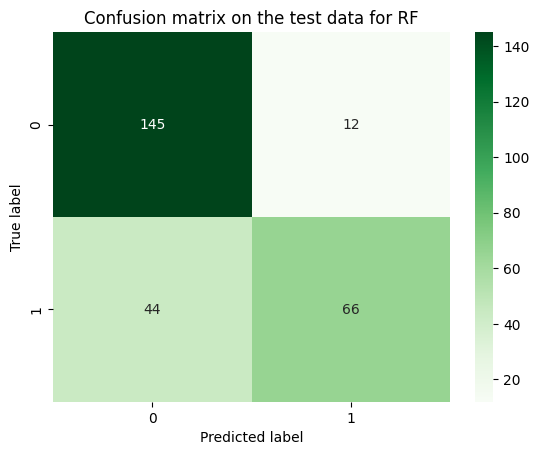

Precision: 0.8461538461538461
Recall: 0.6
F1 Score: 0.7021276595744681


In [60]:
RF = RandomForestClassifier(criterion='gini', n_estimators=32, bootstrap=False, max_depth=4, random_state=120)
RF.fit(X_train, y_train)

y_test_RF_prediction = RF.predict(X_test)
accuracy_rf_test = sk.metrics.accuracy_score(y_test, y_test_RF_prediction)

print("Accuracy on the training dataset: " + str(RF.score(X_train, y_train)))
print("Accuracy on the testing dataset: " + str(accuracy_rf_test))

sns.heatmap(sk.metrics.confusion_matrix(y_test, y_test_RF_prediction), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on the test data for RF')
plt.savefig("./data_analysis_plots/confusion_matrix_test_RF_optimized.png")
plt.show()

precision = sk.metrics.precision_score(y_test, y_test_RF_prediction)
recall = sk.metrics.recall_score(y_test, y_test_RF_prediction)
f1 = sk.metrics.f1_score(y_test, y_test_RF_prediction)

print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))

The model now overfits much less. Also, some evaluation metrics have improved (precision) but recall is still too poor. We need to evaluate another model.

## **SVM - Support-vector machines**

## **Neural Networks**

In this chapter, we will apply implement 2 neural networks for three main purposes:
- Gain experience on useful librairies (TensorFlow, PyTorch, etc.)
- Evaluate model effectiveness in our case, compared to the models implemented previously
- Evaluate the [neural network](#https://github.com/Gdeterline/Neural-Network-Build/blob/main/README.md) we built compared to those from famous libraries. 